In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Sac State/CSC177/data/weather.csv")

In [ ]:
weather = df
weather

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


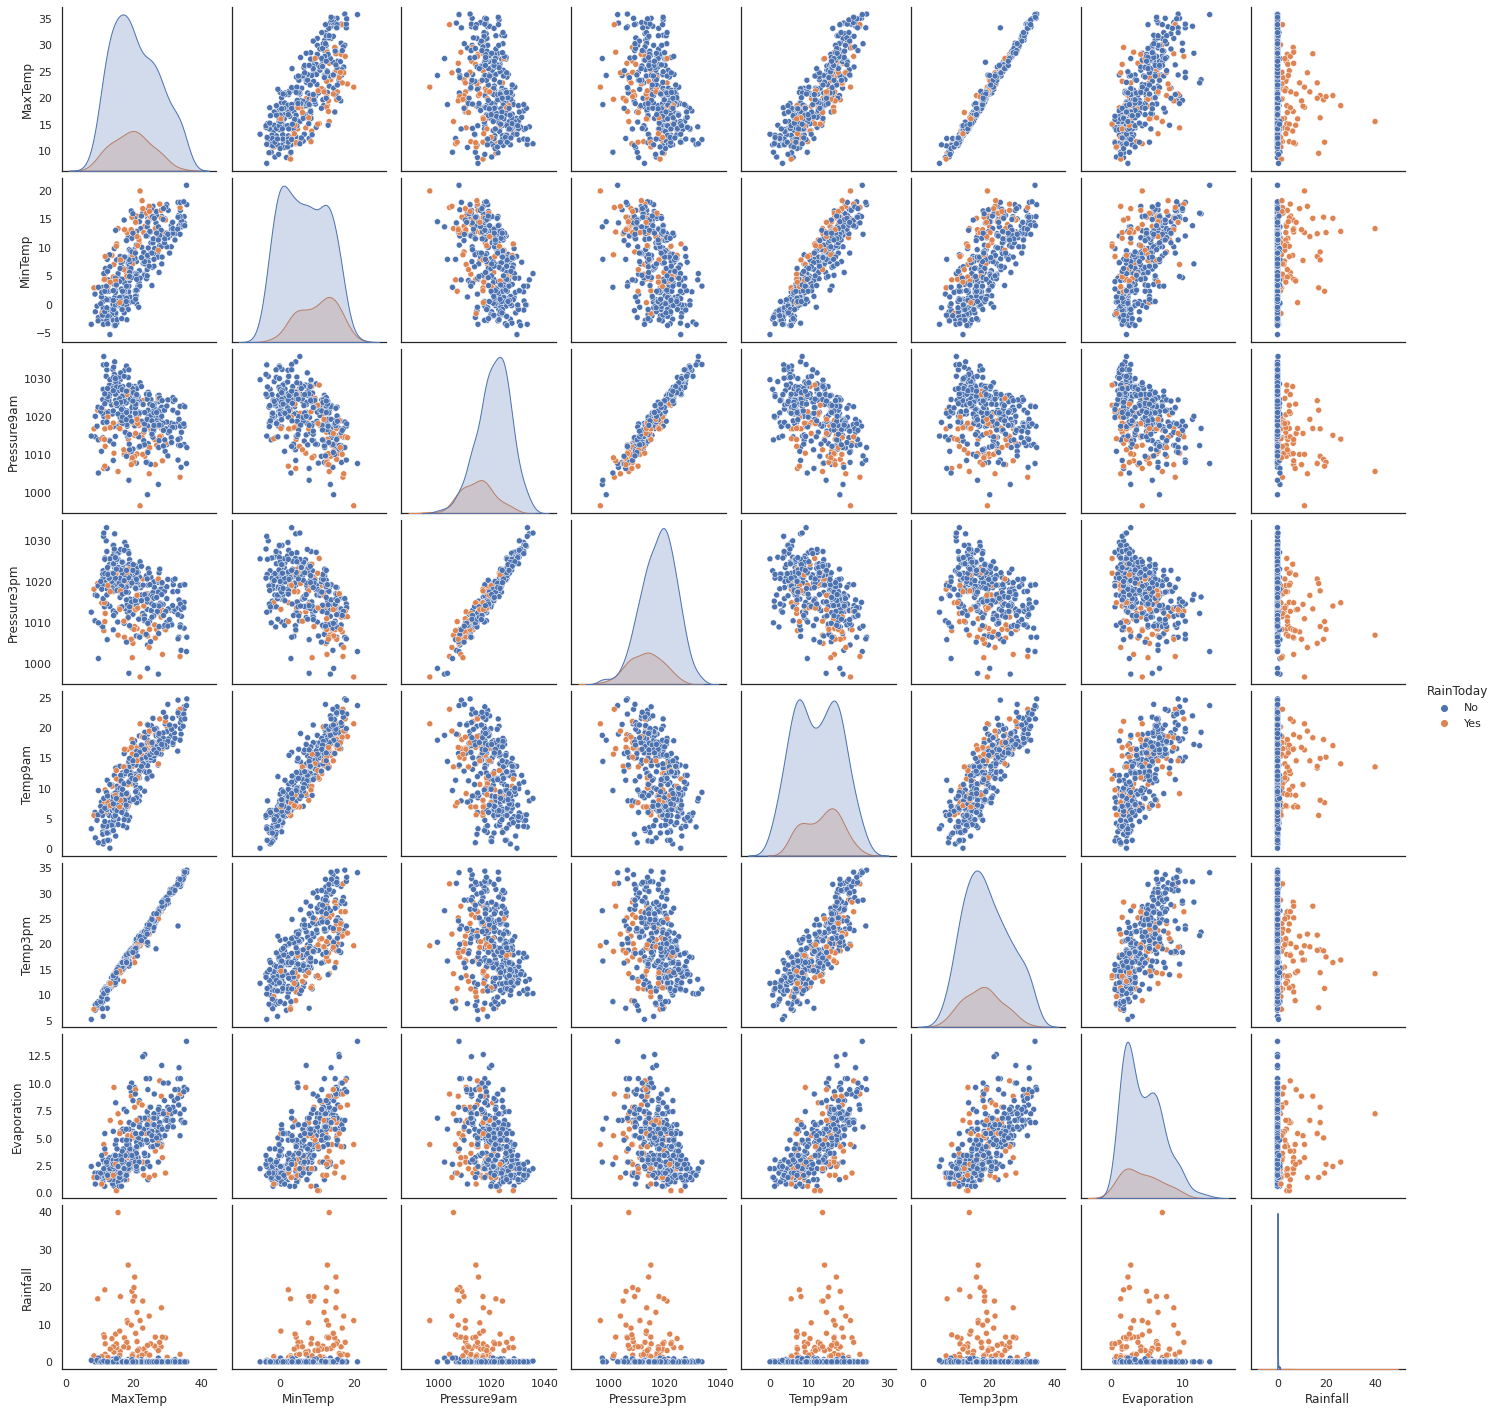

In [ ]:
sns.pairplot(data=weather, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation','Rainfall'), hue='RainToday' )

**Support Vector Machine - SVM**

---


An SVM is a classification algorithm you might apply to a given dataset. This algorithm would attempt to determine a clear distinction within your dataset by drawing a line or plane between your data points. A crude example is shown below using a Weather dataset to classify whether it had rained today. A scatter plot is representing the amount of measued rainfall during the minimal temperature on a given day. It's clear that it must rain in order to measure the amount of rainfall, thus the SVM will be able to perform a linear seperation where one side rained and the other did not. Blue represents days where it did not rain and red represents days where it did rain. 

Text(0, 0.5, 'Rainfall')

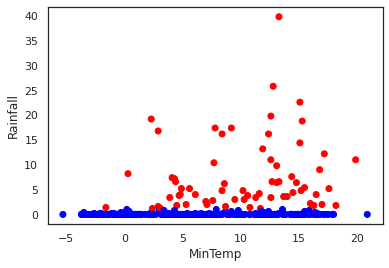

In [ ]:
X = weather.filter(['MinTemp','Rainfall']).to_numpy()
y = weather.filter(['RainToday'])
y['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
y = y['RainToday'].values
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr',);
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')

The following code will generate a line across our scatterplot to show a clear distinction between days where it rained and days where it did not.

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

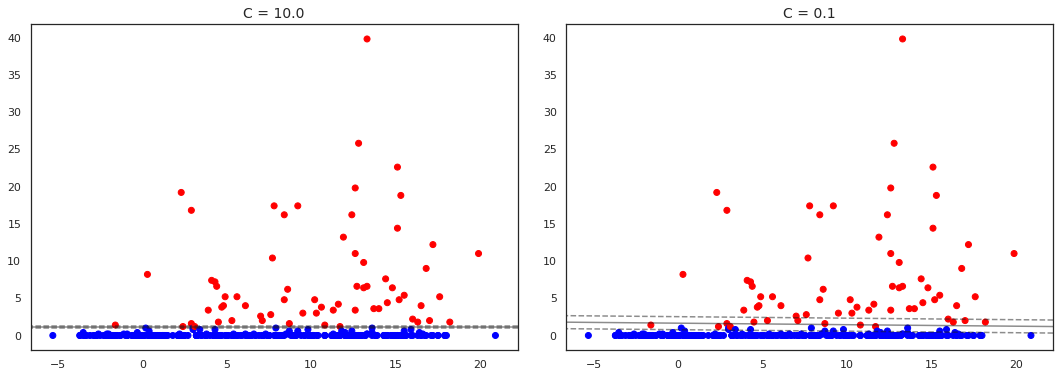

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Since measuring the amount of rainfall only occurs during days when it rains, all points above this line are days where it rained and all points below are days where it did not rain. Although it is hard to see, there appears to be days where it did not rain but there is mesured rainfall. These occurances are most likely outliers or errors and in order to account for them the SVM constructs hard or soft margins along the deciding line. For hard margins (graph on the left), the SVM does not like to allow outliers or values that may border the line in determining classificaton. However,for soft margins (graph on the right), outliers or values that are close to the line are considered for classified. For our dataset, we want to use a hard margin because it's clear to us that in regards to measured rainfall - there is a clear distinction between days that rain and days that do not. Even though there are outliers near our line that report some amount of rainfall on days where it did not rain, we should not consider than for classification like a soft margin would.

Now let's consider a case where an SVM that is difficult to work with on this Weather dataset. The following scatterplot below shows the temperature at 3pm during the minimum temperature on a given day. Red represents days where it rained while blue represents days where it did not rain.

In [ ]:
X = weather.filter(['MinTemp','Temp3pm']).to_numpy()

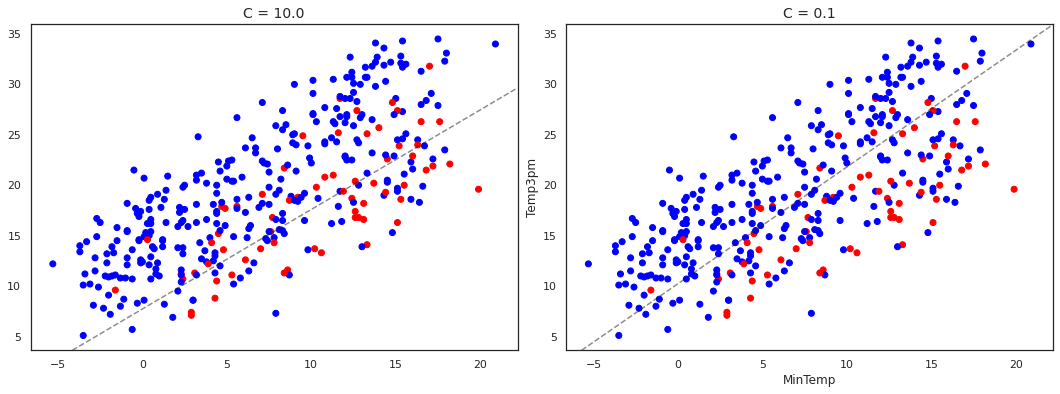

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    plt.xlabel('MinTemp')
    plt.ylabel('Temp3pm') 

While the SVM is able to determine a line to be drawn in order to classify the data, it is not perfectly seperated. Even when we use a hard margin, there are too many overlapping data points of days where it rained and didn't. This situation causes the SVM to perform poorly in this case. Because it will become difficult for the algorithm to distinguish between red and blue points.

However, there is another possible way we could determine whether we can seperate these datapoints. Rather than a straight line, there may be a different type of line (non-linear, circular, etc.) that would be able seperate outliers. If a 2-D representation isn't a proficient solution, we can attempt to transform the datapoints into a 3-D representation to see if there is a clear seperation. All these alternative methods require some form of geometric intuition in order for us to recognize the possible solution. An example of a 2D (left) to 3D (right) transformation solution is shown below.

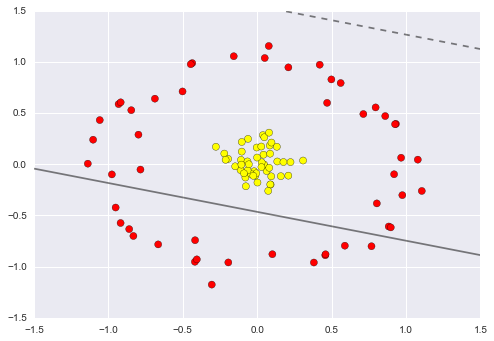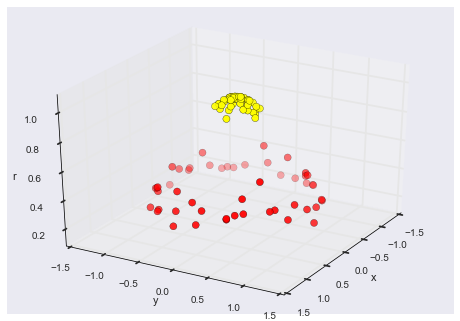

**K-Nearest Neighbor - KNN**

---
KNN is an algorithm that classifies something based what the nearest things to it are classified as. Unlike SVM, KNN doesn't compare the data or patterns but rather finding the nearest datapoints around it. The image below showcases how KNN works. The green dot is an unknown datapoint that needs to be classified. Within the black circle, the green dot seeks the three closest things to it and classifies itself as the one with the most datapoints. In this case, there are two red triangles and one blue square - the green dot will classify itself as a red triangle. However, if the green dot expends its search to the nearest five datapoints, it will find three blue squares and 2 red triangles. Thus, it will classify itself as a blue square in this situation. As you can see, deciding how many datapoints you look for may affect how the green dot will classifies itself as. 


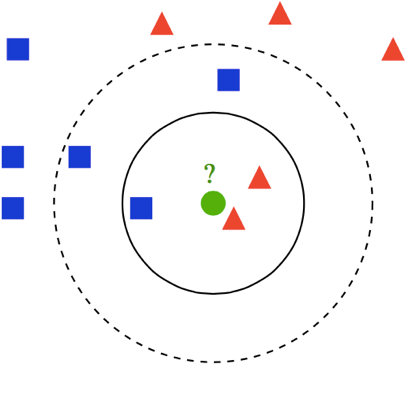

First, let's explore whether the data in the weather dataset has any correlation with each other. 

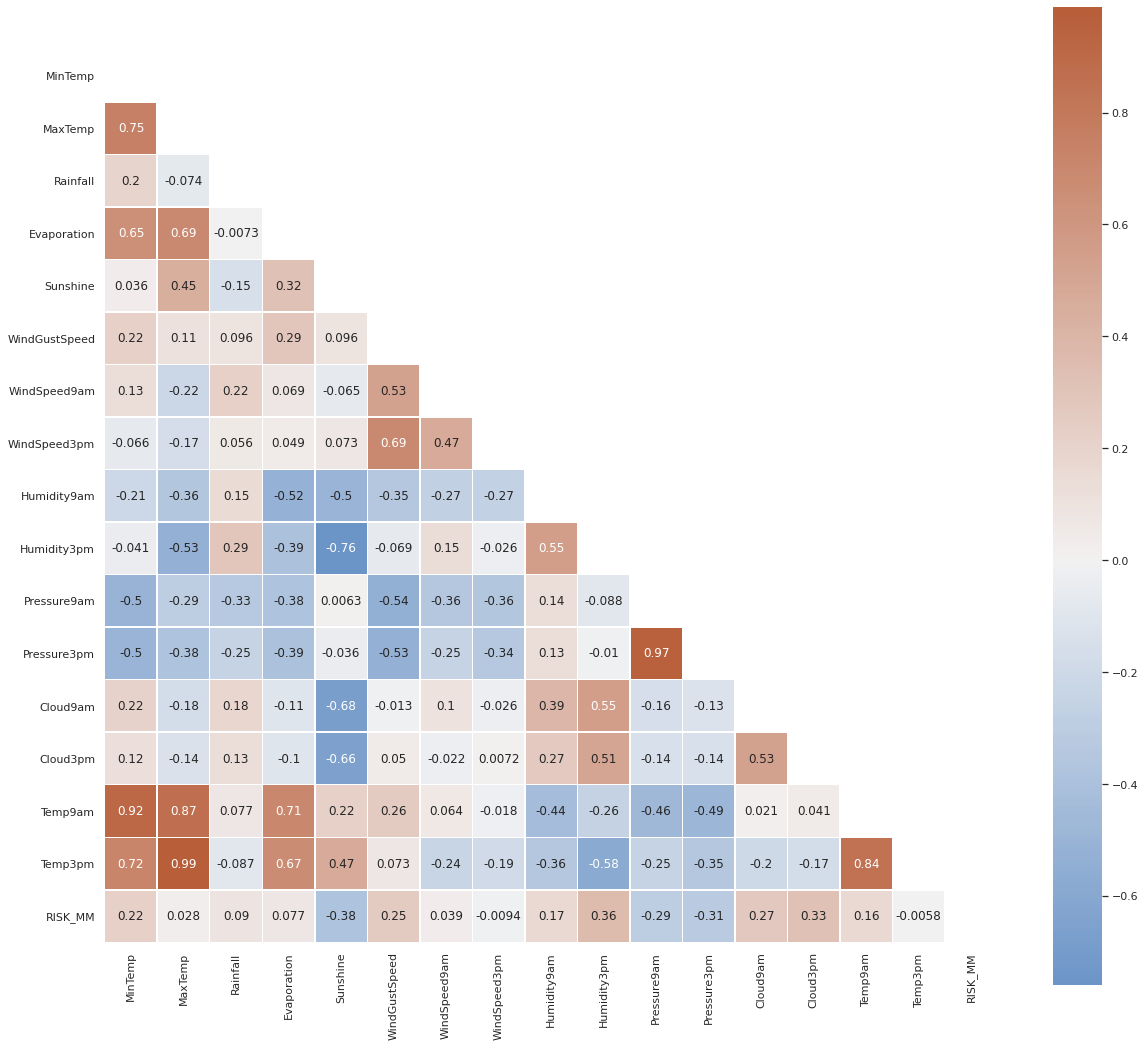

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Filter out some unneccessary data to use for our KNN. This time lets try to predict whether it will rain tomorrow.

In [ ]:
test = df.drop(['Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Cloud9am','Cloud3pm','RISK_MM','RainToday'],axis=1)
X = test.drop(['RainTomorrow'],axis=1)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,8.0,24.3,0.0,3.4,68,29,1019.7,1015.0,14.4,23.6
1,14.0,26.9,3.6,4.4,80,36,1012.4,1008.4,17.5,25.7
2,13.7,23.4,3.6,5.8,82,69,1009.5,1007.2,15.4,20.2
3,13.3,15.5,39.8,7.2,62,56,1005.5,1007.0,13.5,14.1
4,7.6,16.1,2.8,5.6,68,49,1018.3,1018.5,11.1,15.4
...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,38,15,1016.1,1010.8,20.4,30.0
362,7.1,28.4,0.0,11.6,45,22,1020.0,1016.9,17.2,28.2
363,12.5,19.9,0.0,8.4,63,47,1024.0,1022.8,14.5,18.3
364,12.5,26.9,0.0,5.0,69,39,1021.0,1016.2,15.8,25.9


In [ ]:
y = weather.filter(['RainTomorrow'])
y['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
y = y['RainTomorrow'].values

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8918918918918919

By looking for the nearest three neighbors, we were able to get an accuracy score of 89%. However, there is a possible that we were simpily lucky to have predicted correctly within the closest three neighbors. Similar to how flipping a coin three times and having it be heads every time does not mean that the probability of flipping heads is 100%. Rather, we would repeat the three coin flips multiple times and determine an average probability. KNN has a similar idea called K-fold Cross validation to perform multiple predictions of the same dataset to get a more consistant accuracy score.

In [ ]:
#creating list of K for KNN
k_list = list(range(1,50,2))
#creating list of cv scores
cv_scores = []

#perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
#results of cross validation
cv_scores

[0.7671264367816092,
 0.8494252873563217,
 0.8665517241379309,
 0.866551724137931,
 0.8597701149425288,
 0.8563218390804597,
 0.8563218390804597,
 0.8563218390804597,
 0.8563218390804597,
 0.8528735632183908,
 0.8426436781609195,
 0.8495402298850573,
 0.8426436781609195,
 0.8391954022988506,
 0.8391954022988506,
 0.8391954022988506,
 0.8357471264367815,
 0.8255172413793105,
 0.8289655172413793,
 0.8255172413793105,
 0.8220689655172414,
 0.8186206896551724,
 0.8186206896551724,
 0.8186206896551724,
 0.8186206896551724]

We can also use the K-fold Cross validation results to determine the optimal number of neighbors to use.

<Figure size 432x288 with 0 Axes>

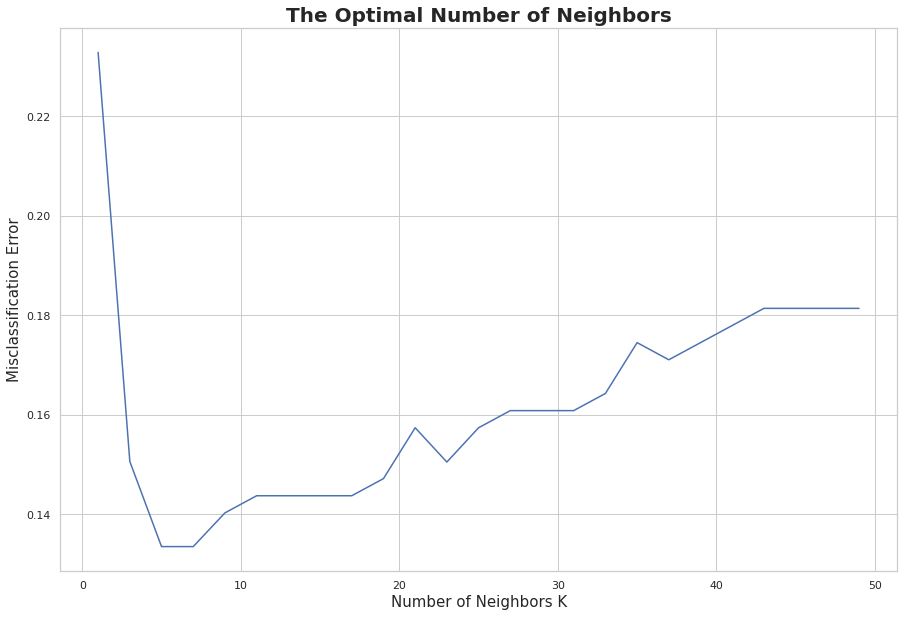

The optimal number of neighbors is 7.


In [ ]:
#changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The Optimal Number of Neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

#finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors suggested is 7. Let's use this number again in our new KNN predication.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
# Fit the classifier to the data
knn.fit(X_train,y_train)

#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8783783783783784

By looking for the nearest seven neighbors, we were able to get an accuracy score of 87.8%. Although this had lower accuracy than our previous KNN predication of 89%, this prediction is likely to be more reliable.